In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def binary_plot(context_size, tgt_lang, model_type, metrics):
    data_dir = "/mnt/data-poseidon/sumire/thesis/"
    
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    for idx, metric in enumerate(metrics):
        bi_data=[]
        neutral = 0
        
        with open(data_dir+f"{context_size+1}-1/en-{tgt_lang}/{model_type}-{tgt_lang}-{context_size+1}-1/{metric}_binary.txt", "r", encoding='utf-8') as file:
            for i in file:
                i = int(i)
                bi_data.append(i)
        print ("number of samples:", len(bi_data))      
        # Create a histogram
        axes[idx].bar(x=[0,1],height=[bi_data.count(0), bi_data.count(1)] , alpha=0.75, color='orange') #density=True
        axes[idx].text(0.2, 0.5, s = f"NEG + NEUT: :{bi_data.count(0)}", ha='center', va='bottom', color='white')
        axes[idx].text(0.8, 0.5, s = f"POS:{bi_data.count(1)}", ha='center', va='bottom', color='white')
        axes[idx].set_xlabel('Binary')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'{metric}{context_size+1}-1({tgt_lang}): POS/non-POS binary plot\ncount-non-POS:{bi_data.count(0)}\ncount-POS:{bi_data.count(1)}')
        axes[idx].set_xlim(min(bi_data),max(bi_data))
        step = 100
        axes[idx].set_xticks(range(0,int(2),1),rotation=45)
        axes[idx].set_yticks(range(0, 4000, 1000))
    
    # Customize the layout and labels as needed
    #plt.tight_layout()
    #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    #plt.subplots_adjust(wspace=0.3)
    #plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    #axes[idx].set_position([0, 0.1, 0.4, 0.8])  # [left, bottom, width, height]
    #axes[idx].set_position([0.5, 0.1, 0.4, 0.8])
    plt.show()
    

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def score_plot(context_size, tgt_lang, model_type, metrics):
    data_dir = "/mnt/data-poseidon/sumire/thesis/"
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    for idx, metric in enumerate(metrics):
        data=[]
        neutral = 0
        with open(data_dir+f"{context_size+1}-1/en-{tgt_lang}/{model_type}-{tgt_lang}-{context_size+1}-1/{metric}_score_diff.txt", "r", encoding='utf-8') as file:
            for i in file:  
                i = float(i)
                data.append(i)
                if i == 0.0:
                    neutral += 1
        

        # Create a histogram
        axes[idx].axvline(x=0, color='red', linestyle='--')
        #axes[idx].text(0, max(data), 'x = 0', ha='center', va='bottom', color='white')
        axes[idx].hist(data, alpha=0.75, color='blue') #density=True
        axes[idx].set_xlabel('Score Gap')
        axes[idx].set_ylabel('Frequency')
        axes[idx].set_title(f'{metric}{context_size+1}-1 model({tgt_lang}): histogram of score difference\nnum_NEUT:{neutral}')
        axes[idx].set_ylim(0, len(data))
        #axes[idx].set_xticks(np.arange(min(data),max(data),(np.arange(min(data),max(data), 100)).any()/10), rotation=45)
        #axes[idx].set_position([0, 0.1, 0.4, 0.8])  # [left, bottom, width, height]
        
        
    # Customize the layout and labels as needed
    #plt.tight_layout()
    #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    #plt.subplots_adjust(wspace=0.3)
    #plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    
    plt.show()
    
    

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

def density_plot(context_size, tgt_lang, model_type, metrics):
    data_dir = "/mnt/data-poseidon/sumire/thesis/"
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    for idx, metric in enumerate(metrics):
        data=[]
        with open(data_dir+f"{context_size+1}-1/en-{tgt_lang}/{model_type}-{tgt_lang}-{context_size+1}-1/{metric}_score_diff.txt", "r", encoding='utf-8') as file:
            for i in file:  
                data.append(float(i))
        # Kernel density estimation 
        sns.histplot(data, color='green', ax=axes[idx])
        axes[idx].set_xlabel('Score Gap')
        axes[idx].set_ylabel('Density')
        axes[idx].set_title(f'{metric}{context_size+1}-1 model({tgt_lang}): Density Estimation')
    
        
    # Customize the layout and labels as needed
    #plt.tight_layout()
    #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
    #plt.subplots_adjust(wspace=0.3)
    #plt.subplots_adjust(wspace=0.3, hspace=0.3) 
    
    plt.show()


# ja

number of samples: 2479
number of samples: 2479


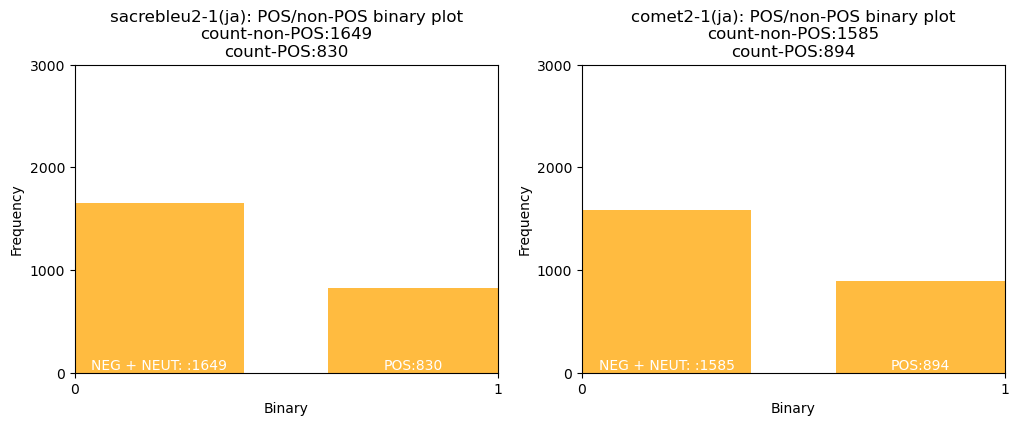

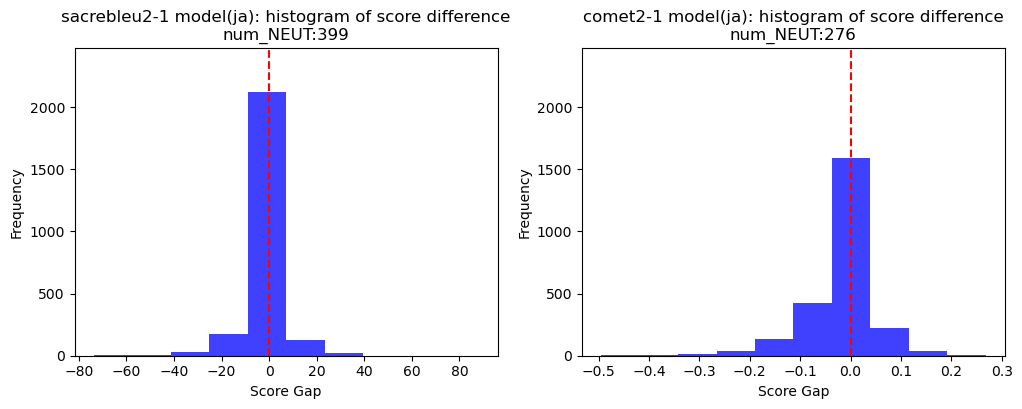

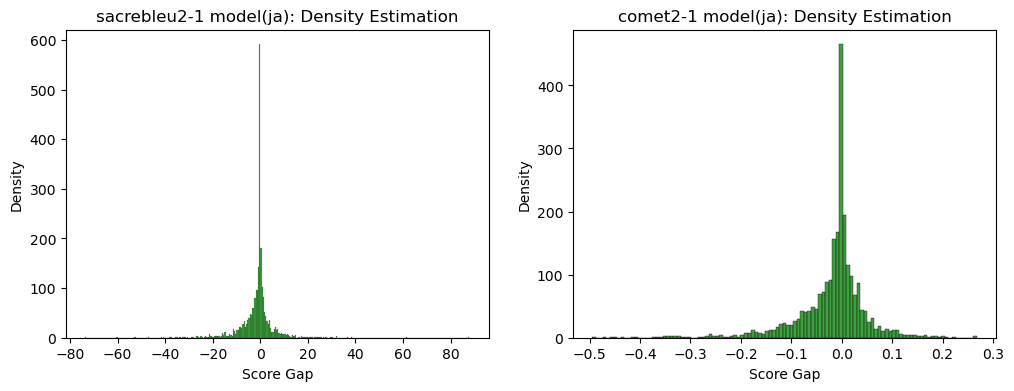

In [4]:
context_size = 1
tgt_lang = "ja"
model_type = "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit"
metrics = ["sacrebleu", "comet"]
binary_plot(context_size, tgt_lang, model_type, metrics)
score_plot(context_size, tgt_lang, model_type, metrics)
density_plot(context_size, tgt_lang, model_type, metrics)

number of samples: 2479
number of samples: 2479


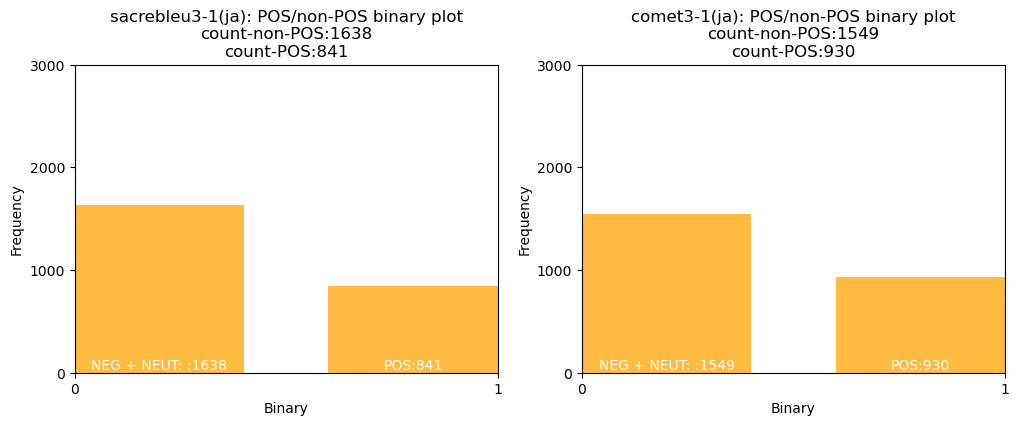

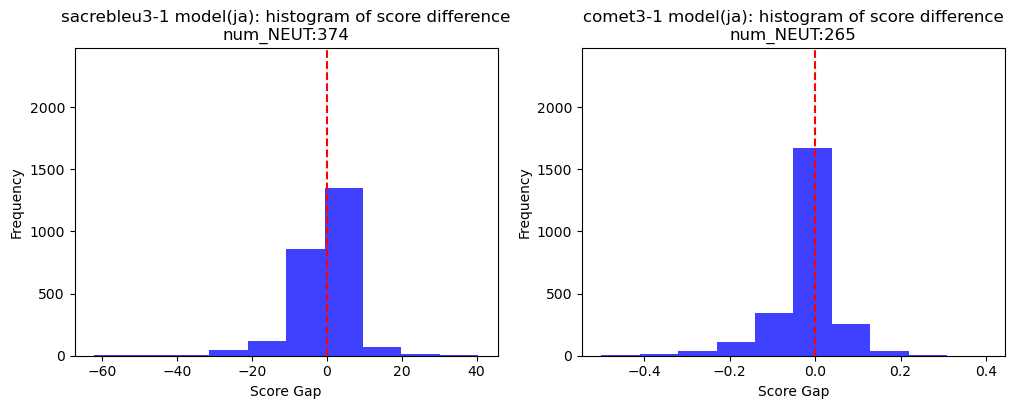

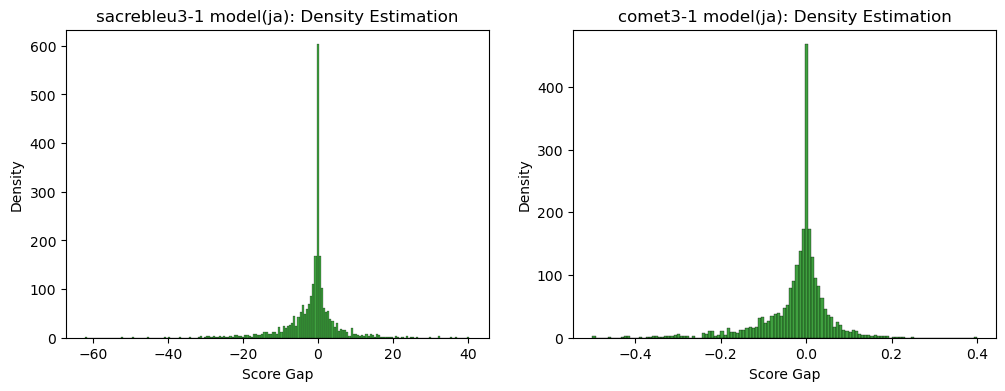

In [5]:
context_size = 2
tgt_lang = "ja"
model_type = "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit"
metrics = ["sacrebleu","comet"]
binary_plot(context_size, tgt_lang, model_type, metrics)
score_plot(context_size, tgt_lang, model_type, metrics)
density_plot(context_size, tgt_lang, model_type, metrics)

number of samples: 52


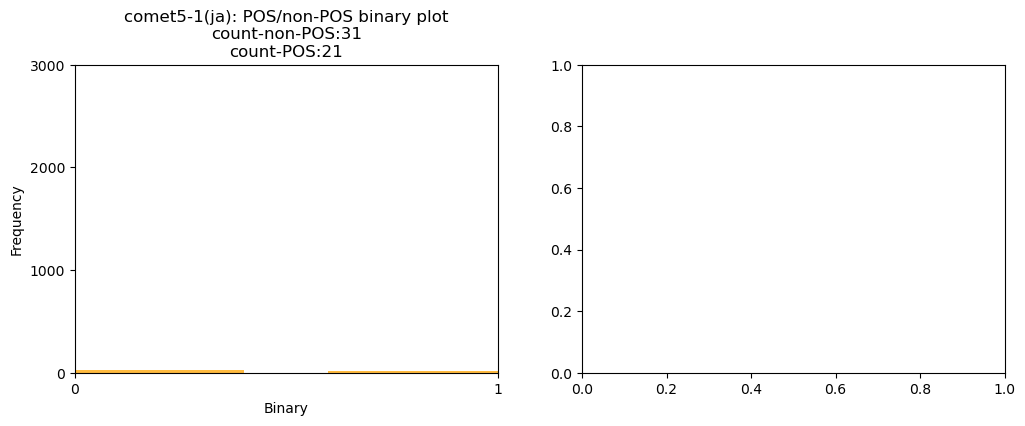

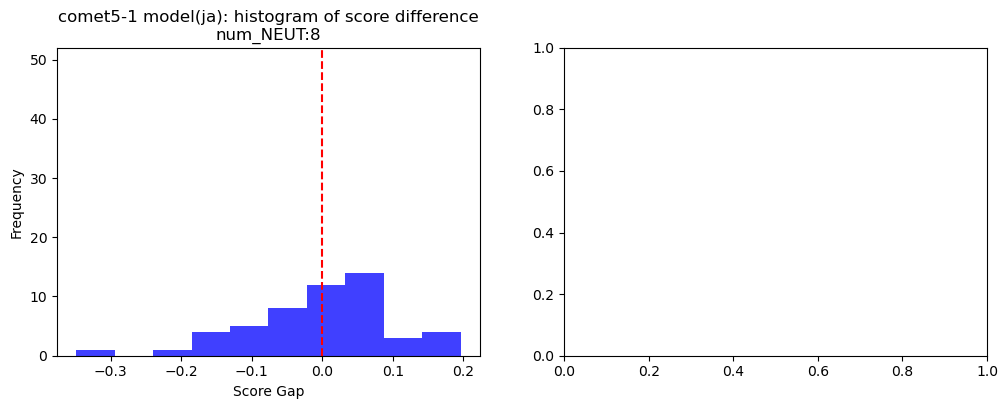

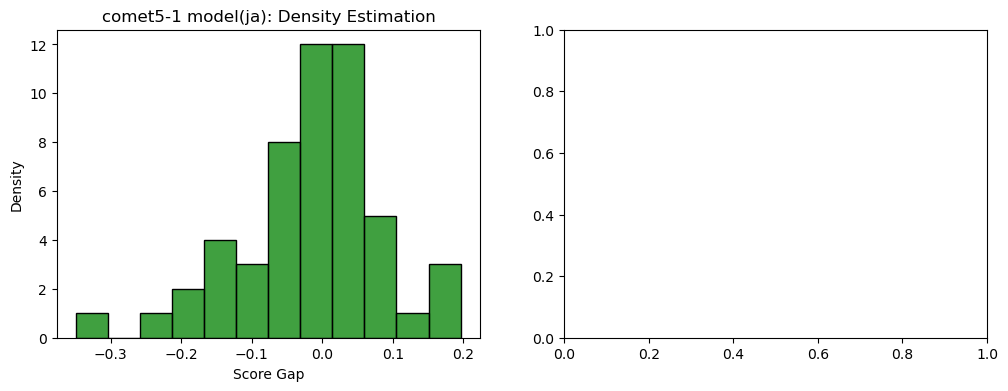

In [6]:
context_size = 4
tgt_lang = "ja"
model_type = "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit"
metrics = ["comet"]
binary_plot(context_size, tgt_lang, model_type, metrics)
score_plot(context_size, tgt_lang, model_type, metrics)
density_plot(context_size, tgt_lang, model_type, metrics)

# de

number of samples: 2385
number of samples: 2385


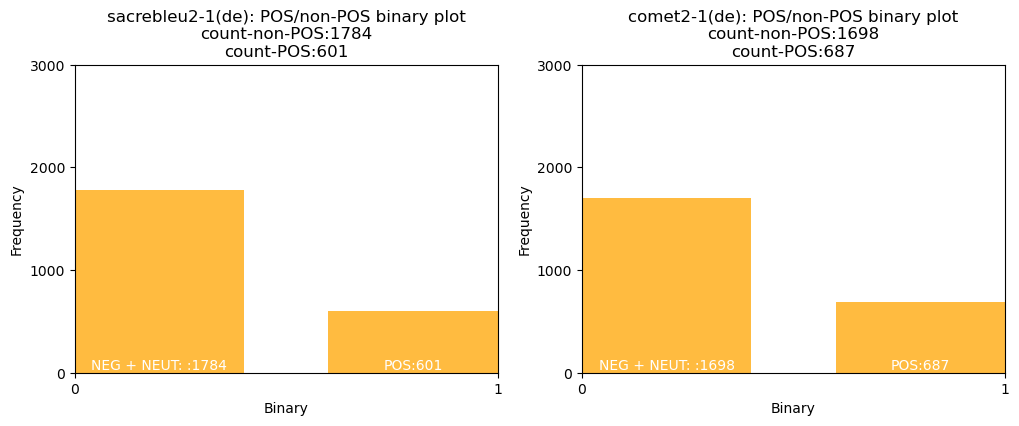

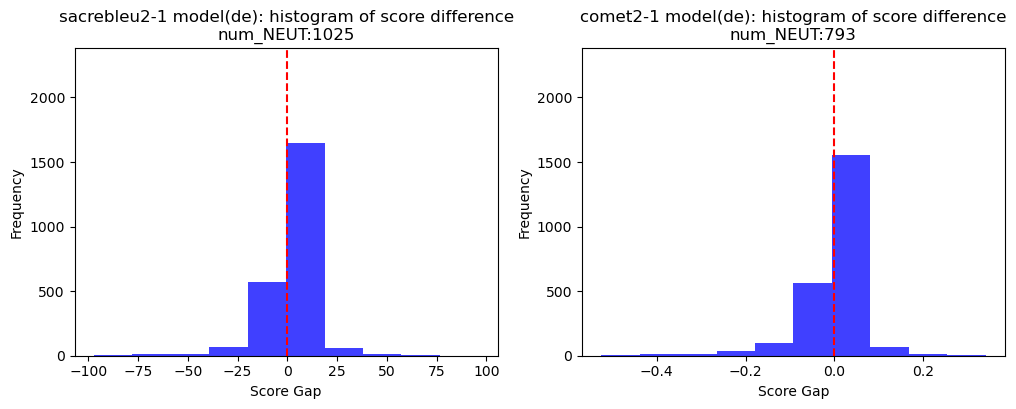

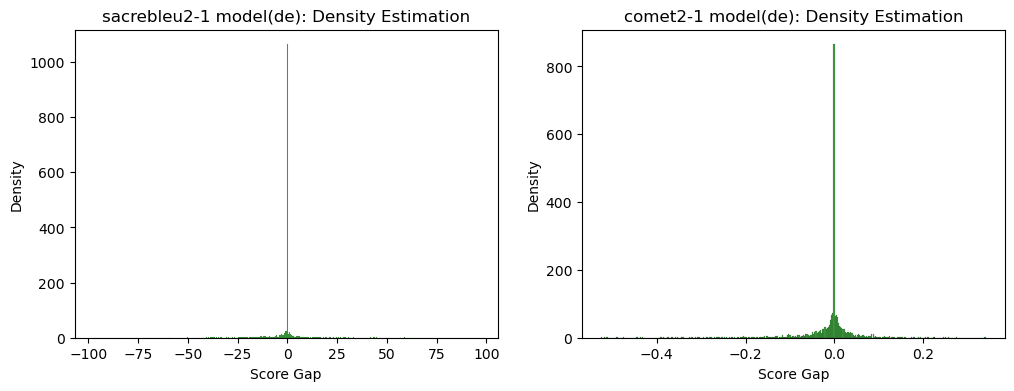

In [7]:
context_size = 1
tgt_lang = "de"
model_type = "Llama-2-70b-instruct-v2-usas-zs-p1-nsplit"
metrics = ["sacrebleu","comet"]
binary_plot(context_size, tgt_lang, model_type, metrics)
score_plot(context_size, tgt_lang, model_type, metrics)
density_plot(context_size, tgt_lang, model_type, metrics)